In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1. Standardization from scratch 

In [7]:
df=sns.load_dataset('tips')

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
### Let's say we want to apply standardisation over total bill feature
# Then we would need to calculate mean and standard deviation of the dataset
# Then we can apply the z-score formula to get normalised data

In [10]:
mean=df['total_bill'].mean()
std=df['total_bill'].std()
print(mean,std)

19.78594262295082 8.902411954856856


In [11]:
normalized_score=[]
for i in df['total_bill']:
    z_score=(i-mean)/std
    normalized_score.append(z_score)

In [12]:
normalized_score

[-0.31406574275923616,
 -1.0610543154877743,
 0.13749727413831675,
 0.4374159943165417,
 0.5396354832162364,
 0.6182658592929247,
 -1.237411016116918,
 0.7968691420956879,
 -0.5331075046871533,
 -0.562313072944209,
 -1.0689173530954432,
 1.7381870728423272,
 -0.49042244338837965,
 -0.15231182625862016,
 -0.5566966175101598,
 0.20152486608647682,
 -1.0621776065745843,
 -0.3926961188359243,
 -0.31631232493285577,
 0.09705879501316246,
 -0.2095996716859214,
 0.05662031588800856,
 -0.45110725535003554,
 2.205476164955218,
 0.0038256348079465756,
 -0.22195587364082986,
 -0.7206971161843952,
 -0.7970809100874638,
 0.2150043591281949,
 -0.015270313667820763,
 -1.149794311345751,
 -0.16129815495309863,
 -0.5308609225135336,
 0.10155195936040208,
 -0.2253257469012591,
 0.48010105561531524,
 -0.3904495366623047,
 -0.320805489280095,
 -0.12310625800156434,
 1.2899939292052043,
 -0.4207783960061701,
 -0.26127106167917374,
 -0.6566695242362348,
 -1.1351915272172233,
 1.1922676046527487,
 -0.1680379

In [13]:
### Now plotting histograms to see the distribution of dataset then vs now

c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_bill', ylabel='Count'>

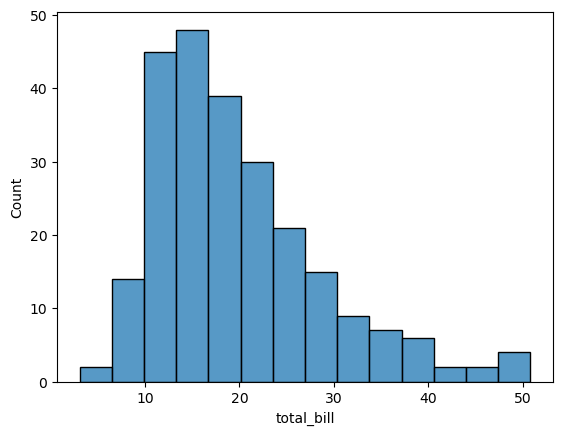

In [14]:
sns.histplot(df['total_bill'])

c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

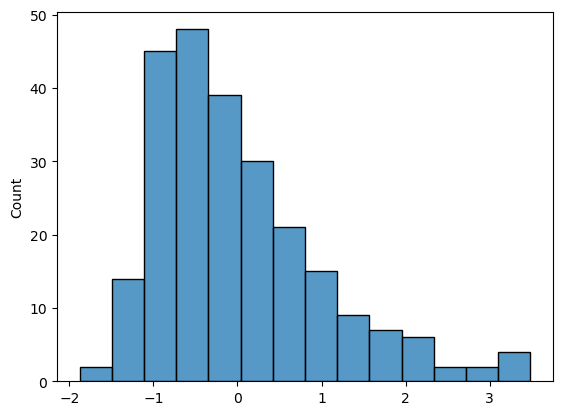

In [15]:
sns.histplot(normalized_score)

In [16]:
### We can see that the distribution of the data doesn't change, only the feature is scaled down bw -3 to 3

## 2. Standardization using standard scaler

In [36]:
''' Rather than applying the zscore formula manually using for loop on each element, we can directly use 
the standard scaler class. Fit internally calculates the mean and standard deviation of the data and 
transform applies z-score on the data and normalizes it'''

' Rather than applying the zscore formula manually using for loop on each element, we can directly use \nthe standard scaler class. Fit internally calculates the mean and standard deviation of the data and \ntransform applies z-score on the data and normalizes it'

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
standardized_data=scaler.fit_transform(df[['total_bill']])

In [39]:
standardized_data

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [40]:
# Creating a dataframe of this data
pd.DataFrame(standardized_data,columns=['total_bill'])

,total_bill
0,-0.314711
1,-1.063235
2,0.137780
3,0.438315
4,0.540745
...,...
239,1.040511
240,0.832275
241,0.324630
242,-0.221287


In [41]:
### Similarly we can standardize any no of features
pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']]),columns=['total_bill','tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [42]:
## So in case any new data comes then we would need to standardize that too
# Eg. total bill= 13 and tip=3
# We can use the same object to standardize it too
scaler.transform([[13,4]])

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

## 2. Min-Max scaler/Normalisation

In [43]:
## Scales down the data in range of 0-1

In [45]:
df=sns.load_dataset('taxis')

In [46]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [47]:
### Importing min max scaler
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Initialising object
min_max=MinMaxScaler()

In [50]:
## Now we can anytime apply fit or transform on our data.

In [51]:
min_max.fit_transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [52]:
# Creating a dataframe of these normalized features
pd.DataFrame(min_max.fit_transform(df[['distance','fare','tip']]),columns=['distance','fare','tip'])

,distance,fare,tip
0,0.043597,0.040268,0.064759
1,0.021526,0.026846,0.000000
2,0.037330,0.043624,0.071084
3,0.209809,0.174497,0.185241
4,0.058856,0.053691,0.033133
...,...,...,...
6428,0.020436,0.023490,0.031928
6429,0.510627,0.382550,0.000000
6430,0.112807,0.100671,0.000000
6431,0.030518,0.033557,0.000000


In [55]:
## for any new data
min_max.transform([[1.60,7.0,2.15]])

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.04359673, 0.04026846, 0.06475904]])

## 4. Unit Vector

In [56]:
## Scales input vectors into unit vectors

In [57]:
from sklearn.preprocessing import normalize

In [58]:
# This normalize is a function this time,we can directly apply it
normalize(df[['distance','fare','tip']])

array([[0.21346145, 0.93389384, 0.28683882],
       [0.15606402, 0.98774694, 0.        ],
       [0.1716575 , 0.93973084, 0.29570197],
       ...,
       [0.25050016, 0.96811656, 0.        ],
       [0.18349711, 0.98302025, 0.        ],
       [0.2429556 , 0.94658025, 0.21203398]])

In [59]:
# Creating a dataframe of these normalized features
pd.DataFrame(normalize(df[['distance','fare','tip']]),columns=['distance','fare','tip'])

,distance,fare,tip
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000
